## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## PROJECT TRENMAX 1/2

In [242]:
#IMPORTAMOS LAS LIBRERÍAS

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [243]:
#LEEMOS EL FICHERO DE RENFE

df_renfe= pd.read_csv('dataset/renfe.csv')

In [244]:
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [245]:
df_renfe.shape

(383568, 9)

PREGUNTA 1: hola Juan, soy Pedro! un gusto tenerte por aquí, menos mal que te hemos fichado, así podemos sacar este tema tan importante adelante!, ¿Ya has importado el fichero verdad? ¡Vamos a hacer un análisis de ello!, lo primero hay que ver si tenemos nulos, ¿Me puedes decir todas las variables que tenemos nulos?

R: Tenemos nulos en las varibles 'TIPO_TREN', 'TIPO_TARIFA', 'CLASE' y 'PRECIO'

In [246]:
df_renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN         38357
TIPO_TARIFA       39559
CLASE             39568
PRECIO            28530
dtype: int64

PREGUNTA 2: Vamos a hacer un .info() a la estructura de dataset, ¿Te has dado cuenta que las columnas fechas podemos convertirlas a date? para hacerlo puedes usar el comando pd.to_datetime(df[i])

R: Resuelto.

In [247]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [227]:
#df_renfe['FECHA_CONSULTA']= pd.to_datetime(df_renfe['FECHA_CONSULTA'])
#df_renfe['FECHA_INICIO']= pd.to_datetime(df_renfe['FECHA_INICIO'])
#df_renfe['FECHA_FIN']= pd.to_datetime(df_renfe['FECHA_FIN'])

In [248]:
for i in (df_renfe.loc[:, ['FECHA_CONSULTA','FECHA_INICIO','FECHA_FIN']]):
    df_renfe[i]= pd.to_datetime(df_renfe[i])
    

In [249]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383568 non-null  datetime64[ns]
 1   FECHA_INICIO    383568 non-null  datetime64[ns]
 2   FECHA_FIN       383568 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383568 non-null  object        
 4   CIUDAD_DESTINO  383568 non-null  object        
 5   TIPO_TREN       345211 non-null  object        
 6   TIPO_TARIFA     344009 non-null  object        
 7   CLASE           344000 non-null  object        
 8   PRECIO          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


PREGUNTA 3: ¿Hay duplicados? ¿En caso haya cuántos son? (borrarlo en caso existan)
R: 24 valores duplicados eliminados.

In [250]:
df_renfe[df_renfe.duplicated(keep='first')].shape

(24, 9)

In [259]:
df_renfe.shape

(383568, 9)

In [260]:
#En vez de hacer 'df_renfe_sin_duplicados=df_renfe.drop_duplicates()' hice una copia porque sino cuando avanzaba me aparecía
#un warning todo el tiempo que estaba trabajando en un df modificado y no se qué supongo que es por el python aca en visual
df_renfe2=df_renfe.copy()

In [261]:
df_renfe2.drop_duplicates(inplace=True)

In [262]:
df_renfe2.shape

(383544, 9)

In [263]:
df_renfe_sin_duplicados= df_renfe2.copy()

In [264]:
df_renfe_sin_duplicados.shape

(383544, 9)

PREGUNTA 4: ¡Juan! se me ocurre crear dos variables que serán super interesantes y probablemente importantes para el modelo: a) Tiempo_Viaje: variable que me indica en minutos la duración del viaje. b) Dif_Ini_Bus: variable que me indica en minutos la diferencia entre la fecha de inicio de viaje y la fecha de búsqueda, ¿Lo puedes hacer?  seguro que sí! te doy unas pistas: puedo restar las fechas sin problemas ya que ahora son dates! y si quiero convertirlo en minutos, podrías dividirlo por una función como esta np.timedelta64(1,'m'), buena suerte! :)

In [265]:
df_renfe_sin_duplicados['TIEMPO_VIAJE'] = (df_renfe['FECHA_FIN'] - df_renfe['FECHA_INICIO'])/np.timedelta64(1,'m')

In [266]:
df_renfe_sin_duplicados.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0


In [267]:
df_renfe_sin_duplicados['DIF_INI_BUS']=(df_renfe['FECHA_INICIO'] - df_renfe['FECHA_CONSULTA'])/np.timedelta64(1,'m')

In [268]:
df_renfe_sin_duplicados.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333


PREGUNTA 5: ¡Qué bien han quedado esas variables! y me parece que podemos hacer "algo más" con las fechas, te comparto este código (el código está justo debajo) y dime qué es lo que está haciendo.

R: Dividir columnas de formato DATE en diferentes unidades de tiempo (Y/M/D..)

In [269]:
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    df_renfe_sin_duplicados[col + '_HORA'] = df_renfe_sin_duplicados[col].dt.hour
    df_renfe_sin_duplicados[col + '_NOMBREDIA'] = df_renfe_sin_duplicados[col].dt.day_name()
    ##O .dt.weekday_name
    df_renfe_sin_duplicados[col + '_DIA'] = df_renfe_sin_duplicados[col].dt.day
    df_renfe_sin_duplicados[col + '_MES'] = df_renfe_sin_duplicados[col].dt.month
    
    del df_renfe_sin_duplicados[col]

df_renfe_sin_duplicados.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,25,5,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,26,6


PREGUNTA 6: En el precio existen nulos, ¿Qué porcentaje representa del total del dataset?
R: 7.4 %

In [270]:
(df_renfe_sin_duplicados['PRECIO'].isnull().sum()) * 100 / len(df_renfe_sin_duplicados)

7.434870575475044

PREGUNTA 7: Vamos a analizar los nulos de cada columna, explícame qué harías con cada columna nula, recuerda que en el peor de los casos la borramos!

R:

In [271]:
df_renfe_sin_duplicados.isnull().sum()

CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                   38357
TIPO_TARIFA                 39554
CLASE                       39563
PRECIO                      28516
TIEMPO_VIAJE                    0
DIF_INI_BUS                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
dtype: int64

Primero analizamos las columnas categóricas con nulos ('TIPO_TREN','TIPO_TARIFA','CLASE')

In [272]:
(df_renfe_sin_duplicados['TIPO_TREN'].isnull().sum() * 100)/len(df_renfe_sin_duplicados)

10.00067788832572

In [273]:
(df_renfe_sin_duplicados['TIPO_TARIFA'].isnull().sum() * 100)/len(df_renfe_sin_duplicados)

10.3127672444361

In [274]:
(df_renfe_sin_duplicados['CLASE'].isnull().sum() * 100)/len(df_renfe_sin_duplicados)

10.31511378094821

In [275]:
df_renfe_sin_duplicados["TIPO_TREN"].unique()

array(['ALVIA', 'AVE', 'REGIONAL', 'AVE-TGV', 'R. EXPRES', 'LD',
       'INTERCITY', 'TRENHOTEL', 'MD-LD', nan, 'AV City', 'MD-AVE',
       'LD-MD', 'AVE-LD', 'AVE-MD', 'LD-AVE', 'MD'], dtype=object)

In [277]:
df_renfe_sin_duplicados["TIPO_TREN"].fillna('sin informacion', inplace=True)

In [278]:
df_renfe_sin_duplicados["TIPO_TREN"].unique()

array(['ALVIA', 'AVE', 'REGIONAL', 'AVE-TGV', 'R. EXPRES', 'LD',
       'INTERCITY', 'TRENHOTEL', 'MD-LD', 'sin informacion', 'AV City',
       'MD-AVE', 'LD-MD', 'AVE-LD', 'AVE-MD', 'LD-AVE', 'MD'],
      dtype=object)

In [280]:
df_renfe_sin_duplicados["TIPO_TARIFA"].fillna('sin informacion', inplace=True)

In [281]:
df_renfe_sin_duplicados["TIPO_TARIFA"].unique()

array(['Flexible', 'Promo', 'Adulto ida', 'sin informacion', 'Promo +',
       'COD.PROMOCIONAL', 'Mesa', 'Individual-Flexible', '4x100',
       'Grupos Ida', 'Doble Familiar-Flexible'], dtype=object)

In [283]:
df_renfe_sin_duplicados["CLASE"].fillna('sin informacion', inplace=True)

In [284]:
df_renfe_sin_duplicados["CLASE"].unique()

array(['Turista', 'Preferente', 'sin informacion', 'Turista con enlace',
       'Turista Plus', 'TuristaSólo plaza H', 'PreferenteSólo plaza H',
       'Cama Turista', 'Cama G. Clase', 'Turista PlusSólo plaza H'],
      dtype=object)

Ahora analizamos la variable dependiente 'PRECIO'. Ya sabemos que los nulos equivalen al 7.4%

In [285]:
df_renfe_sin_duplicados['PRECIO'].isnull().sum()

28516

In [286]:
df_renfe_sin_duplicados.dropna(subset=['PRECIO'],inplace=True)

In [287]:
df_renfe_sin_duplicados['PRECIO'].isnull().sum()

0

In [288]:
df_renfe_sin_duplicados.isnull().sum()

CIUDAD_ORIGEN               0
CIUDAD_DESTINO              0
TIPO_TREN                   0
TIPO_TARIFA                 0
CLASE                       0
PRECIO                      0
TIEMPO_VIAJE                0
DIF_INI_BUS                 0
FECHA_CONSULTA_HORA         0
FECHA_CONSULTA_NOMBREDIA    0
FECHA_CONSULTA_DIA          0
FECHA_CONSULTA_MES          0
FECHA_INICIO_HORA           0
FECHA_INICIO_NOMBREDIA      0
FECHA_INICIO_DIA            0
FECHA_INICIO_MES            0
FECHA_FIN_HORA              0
FECHA_FIN_NOMBREDIA         0
FECHA_FIN_DIA               0
FECHA_FIN_MES               0
dtype: int64

In [289]:
df_renfe_sin_duplicados.shape

(355028, 20)

PREGUNTA 8: Perfecto ya no tenemos los nulos (espero!), como bien sabes nulos no significa que el resto de variables estén bien, vamos a analizarlas con un "value_counts" o con un "hist" cada una de ellas según sean numéricas o string (con un "for" iría mejor), ¿Ves alguna variable que hay que limpiarla?¿Qué haya outlier?¿Qué haya datos que no tienen sentido a nivel de negocio? realizar un mini resumen variable a variable si ves algo raro con ellas, si no ves nada raro no hace falta ponerlo en este resumen, cuando hayas terminado el proceso de limpieza crea una copia del dataset con el nombre de "df_renfe_clean"

In [290]:
df_renfe_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355028 entries, 0 to 383567
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CIUDAD_ORIGEN             355028 non-null  object 
 1   CIUDAD_DESTINO            355028 non-null  object 
 2   TIPO_TREN                 355028 non-null  object 
 3   TIPO_TARIFA               355028 non-null  object 
 4   CLASE                     355028 non-null  object 
 5   PRECIO                    355028 non-null  float64
 6   TIEMPO_VIAJE              355028 non-null  float64
 7   DIF_INI_BUS               355028 non-null  float64
 8   FECHA_CONSULTA_HORA       355028 non-null  int32  
 9   FECHA_CONSULTA_NOMBREDIA  355028 non-null  object 
 10  FECHA_CONSULTA_DIA        355028 non-null  int32  
 11  FECHA_CONSULTA_MES        355028 non-null  int32  
 12  FECHA_INICIO_HORA         355028 non-null  int32  
 13  FECHA_INICIO_NOMBREDIA    355028 non-null  object

In [292]:
target = ['PRECIO']
def obtener_lista_variables(dataset):
    lista_num = []
    lista_cat = []
    
    for i in dataset:
        if (dataset[i].dtype.kind=='i' or dataset[i].dtype.kind=='f') and i not in target:
            lista_num.append(i)
        elif (dataset[i].dtype.kind=='O') and i not in target:
            lista_cat.append(i)
    return lista_num, lista_cat

In [293]:
#df_renfe_sin_duplicados['CIUDAD_ORIGEN'].dtype.kind

In [294]:
lnum,lcat = obtener_lista_variables(df_renfe_sin_duplicados)

VARIABLES NUMÉRICAS: 

Análisis general: Las variables ___ Y ___ Y ___ tienen una distribución normal, mientras que hay valiables como____ y ____ y____ que debemos revisar para ver si es posible ajutarlas.

Análisis por variable:
1. 'TIEMPO_VIAJE'
Los valores parecen lógicos, siendo el min 98 min y el máx 745 min. Al hacer un value counts observamos que hay tiempos de viajes que tienen una baja frecuencia. Incluso hay un viaje de duración de 174 minutos que sólo se realiza una vez. Un poco raro pero no imposible.
2. 'DIF_INI_BUS'
Hay diferencias negativas, es decir, al momento de la búsqueda también se revisaron viajes ya realizados.¿tiene lógica?
3....

In [295]:
lnum

['TIEMPO_VIAJE',
 'DIF_INI_BUS',
 'FECHA_CONSULTA_HORA',
 'FECHA_CONSULTA_DIA',
 'FECHA_CONSULTA_MES',
 'FECHA_INICIO_HORA',
 'FECHA_INICIO_DIA',
 'FECHA_INICIO_MES',
 'FECHA_FIN_HORA',
 'FECHA_FIN_DIA',
 'FECHA_FIN_MES']

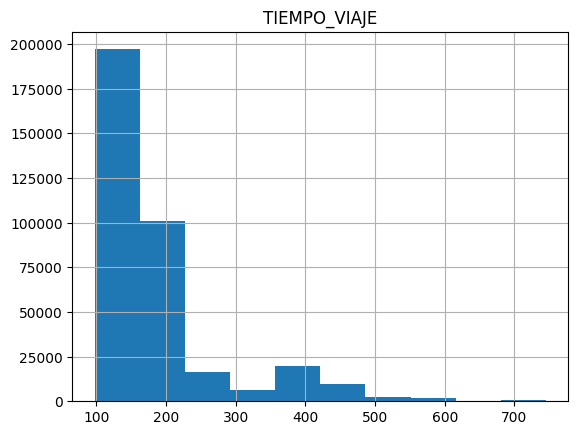

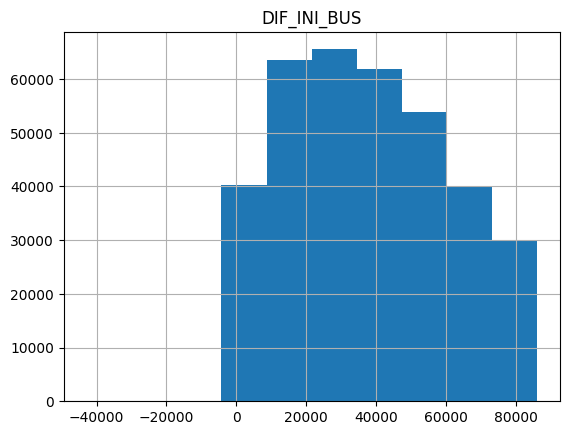

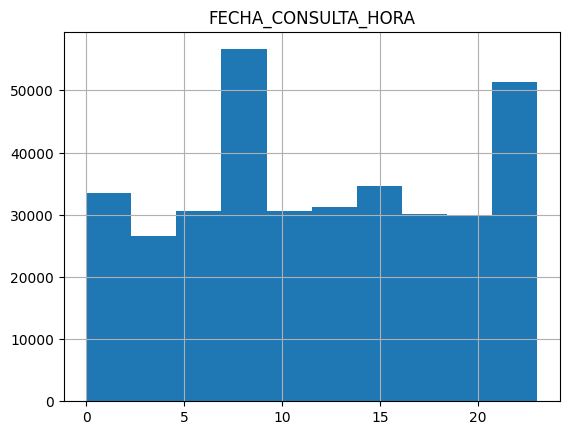

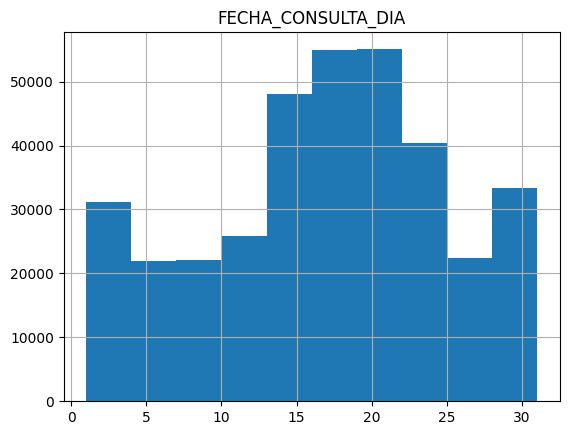

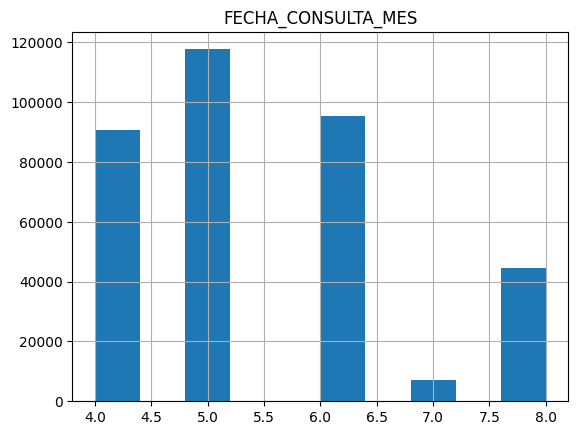

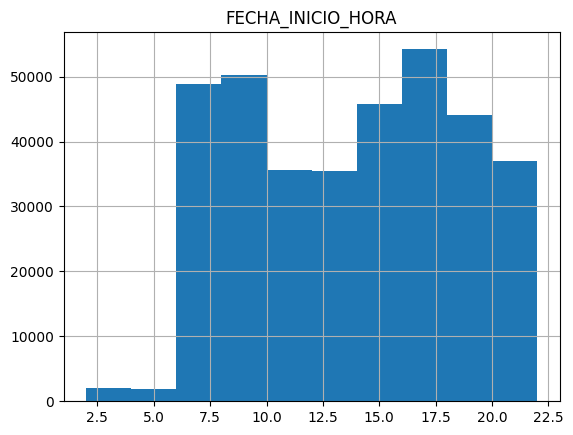

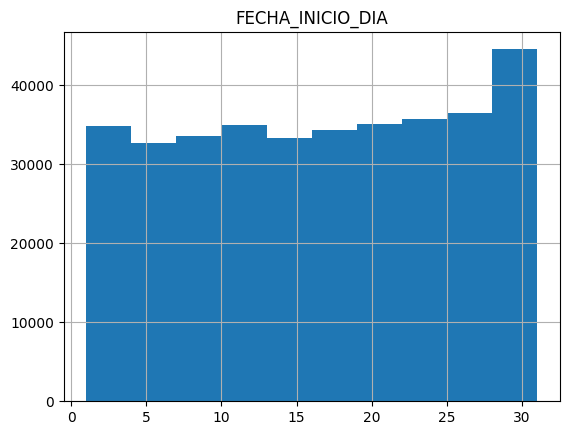

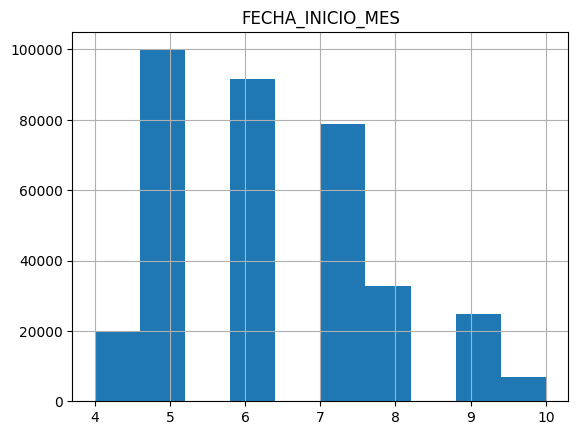

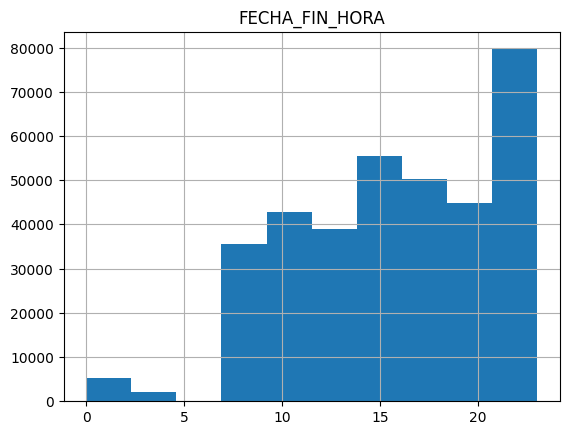

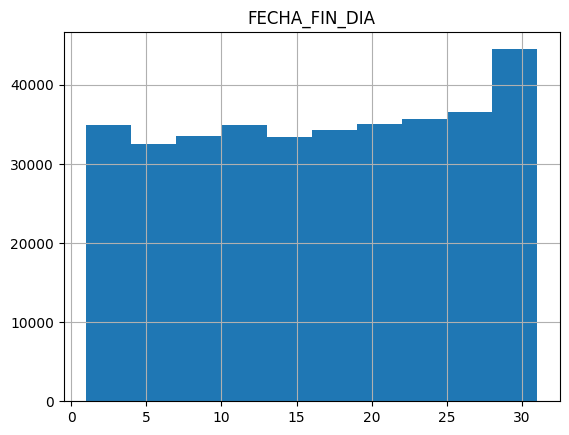

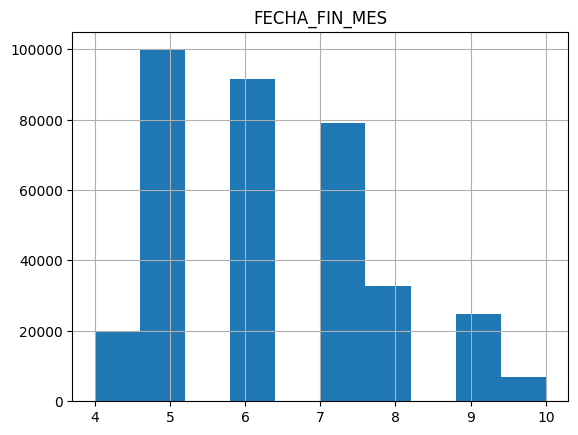

In [296]:
for i in lnum:
    df_renfe_sin_duplicados.hist(i)

In [ ]:
#df_renfe_sin_duplicados['TIEMPO_VIAJE'].min()
#df_renfe_sin_duplicados['TIEMPO_VIAJE'].max()
#df_renfe_sin_duplicados['TIEMPO_VIAJE'].hist()
#df_renfe_sin_duplicados['TIEMPO_VIAJE'].sort_values()
#df_renfe_sin_duplicados['TIEMPO_VIAJE'].value_counts()
#df_renfe_sin_duplicados['DIF_INI_BUS'].sort_values()

VARIABLES CATEGÓRICAS: 
Análisis general: 

Análisis por variable:
1. '


In [300]:
lcat

['CIUDAD_ORIGEN',
 'CIUDAD_DESTINO',
 'TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_CONSULTA_NOMBREDIA',
 'FECHA_INICIO_NOMBREDIA',
 'FECHA_FIN_NOMBREDIA']

In [301]:
for i in lcat:
    print(df_renfe_sin_duplicados.value_counts(i))

CIUDAD_ORIGEN
MADRID        176791
BARCELONA      59809
SEVILLA        53652
VALENCIA       52040
PONFERRADA     12736
Name: count, dtype: int64
CIUDAD_DESTINO
MADRID        178237
BARCELONA      60686
VALENCIA       54667
SEVILLA        53050
PONFERRADA      8388
Name: count, dtype: int64
TIPO_TREN
AVE                226696
sin informacion     35443
ALVIA               19043
REGIONAL            16591
INTERCITY           16431
AV City              9214
MD-LD                6779
AVE-TGV              4456
R. EXPRES            4131
TRENHOTEL            3789
LD                   3649
AVE-LD               2857
AVE-MD               2351
LD-MD                2346
MD-AVE                763
MD                    489
Name: count, dtype: int64
TIPO_TARIFA
Promo                      225957
Flexible                    65055
sin informacion             35453
Adulto ida                  20727
Promo +                      7669
COD.PROMOCIONAL               144
Individual-Flexible            11
Mesa   

PREGUNTA 9: Hola Juan, soy María (la CEO), ¡Que bien que ya tenemos el dataset limpio! me gustaría sacar algunos "insights" de la competencia, me puedes ayudar en lo siguiente: (Consejo: son varias preguntas se pueden distribuir las preguntas entre los participantes de cada grupo), en cada una de ellas poner el código y resultado.

A. ¿Cuál es la fecha mínima y máxima de consulta de las simulaciones? 

R: Fecha mínima es 11.04.2019 y la máxima es 22.08.2019

In [302]:
#df_renfe_sin_duplicados['FECHA_CONSULTA'].sort_values()
#df_renfe_sin_duplicados['FECHA_CONSULTA'].min()
#df_renfe_sin_duplicados['FECHA_CONSULTA'].max()

In [303]:
(df_renfe_sin_duplicados.loc[:, ['FECHA_CONSULTA_DIA','FECHA_CONSULTA_MES']]).sort_values(by=['FECHA_CONSULTA_MES','FECHA_CONSULTA_DIA'])

,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES
113,11,4
314,11,4
640,11,4
1423,11,4
1922,11,4
...,...,...
383348,22,8
383386,22,8
383531,22,8
383536,22,8


B. ¿Cuál es el precio mímino, máximo y medio del billete?

R: El precio mínimo es 12.85, el precio máximo 342.80 y el precio medio del billete es 61.43 euros. Nota: Hay dos billetes con valor 0.

In [304]:
df_renfe_sin_duplicados['PRECIO'].sort_values()
#df_renfe_sin_duplicados['PRECIO'].min()
#df_renfe_sin_duplicados['PRECIO'].max()

136925      0.00
121961      0.00
175194     12.85
375192     12.85
347696     12.85
           ...  
168256    214.20
253028    290.40
202466    290.40
376642    290.40
16565     342.80
Name: PRECIO, Length: 355028, dtype: float64

In [305]:
df_renfe_sin_duplicados['PRECIO'].mean()

61.435680763207436

C. ¿Cuántas rutas se simularon en el mes de agosto de 2019?

R: Se simularon 8 rutas: 'SEVILLA MADRID', 'BARCELONA MADRID', 'VALENCIA MADRID', 'MADRID BARCELONA', 'MADRID SEVILLA', 'MADRID VALENCIA',
       'MADRID PONFERRADA', 'PONFERRADA MADRID'

In [306]:
df_renfe_sin_duplicados['RUTA'] = df_renfe_sin_duplicados.CIUDAD_ORIGEN.str.cat(df_renfe_sin_duplicados.CIUDAD_DESTINO, sep=' ')

In [307]:
df_renfe_sin_duplicados['RUTA'].value_counts()
#df_renfe_sin_duplicados['RUTA'].unique()

RUTA
MADRID BARCELONA     60686
BARCELONA MADRID     59809
MADRID VALENCIA      54667
SEVILLA MADRID       53652
MADRID SEVILLA       53050
VALENCIA MADRID      52040
PONFERRADA MADRID    12736
MADRID PONFERRADA     8388
Name: count, dtype: int64

D. ¿Cuántas rutas se simularon que la duración del viaje sea superior a 4 horas?
Las 8 rutas disponibles pueden hacerse en una duración mayor a 4 horas.

In [319]:
#df_renfe_sin_duplicados.loc[:,['TIEMPO_VIAJE','RUTA']]
#(df_renfe_sin_duplicados[df_renfe_sin_duplicados['TIEMPO_VIAJE']<240])['RUTA'].unique()
(df_renfe_sin_duplicados[df_renfe_sin_duplicados['TIEMPO_VIAJE']>240])['RUTA'].value_counts()

RUTA
MADRID VALENCIA      14630
VALENCIA MADRID      13292
PONFERRADA MADRID    12736
MADRID PONFERRADA     6671
BARCELONA MADRID      2635
SEVILLA MADRID        2128
MADRID BARCELONA      1968
MADRID SEVILLA        1526
Name: count, dtype: int64

In [321]:
#(df_renfe_sin_duplicados[df_renfe_sin_duplicados['TIEMPO_VIAJE']<240])['RUTA'].value_counts()
#hay sólo una ruta que no puede demorar menos de 4 horas, que es la ruta ponferrada madrid 

FINAL PARTE 1: Vamos grabando lo hecho, puedes subir el fichero desarrollado? además crea un "pickle" para tener el dataset en nuestro drive y así no volver a ejecutar todo de nuevo.

In [ ]:
#df_renfe_clean=df_renfe_sin_duplicados.copy()
#pd.to_pickle(df_renfe_clean,"project_trenmax\Project TrenMax en clase 1_2.ipynb")